# Modeling 2D Air Resistance with 

In [83]:
# Import libraries
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import statistics

In [84]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
custom_gravitational_acceleration = -3  # m/s^2
mass = 0.0036  # kg
linear_coefficient = 0.009202773498812211
quadratic_coefficient = 0.010466946748873742

In [85]:
# Parameters
velocity_initial = 10  # m/s
angle = math.pi / 4  # rad

In [86]:
def model_without_air_resistance(no_times):
    no_accelerations_x = [0]
    no_velocities_x = [math.cos(angle) * velocity_initial]
    no_positions_x = [0]
    no_accelerations_y = [0]
    no_velocities_y = [math.sin(angle) * velocity_initial]
    no_positions_y = [0]
    for i in range(len(no_times) - 1):
        no_accelerations_x.append(0)
        no_velocities_x.append(no_velocities_x[i] + no_accelerations_x[i + 1] * (no_times[i + 1] - no_times[i]))
        no_positions_x.append(no_positions_x[i] + no_velocities_x[i + 1] * (no_times[i + 1] - no_times[i]))
        no_accelerations_y.append(gravitational_acceleration)
        no_velocities_y.append(no_velocities_y[i] + no_accelerations_y[i + 1] * (no_times[i + 1] - no_times[i]))
        no_positions_y.append(no_positions_y[i] + no_velocities_y[i + 1] * (no_times[i + 1] - no_times[i]))
        if no_positions_x[i + 1] >= 6:
            break
    return no_accelerations_x, no_velocities_x, no_positions_x, no_accelerations_y, no_velocities_y, no_positions_y


# Model 2D motion with air resistance
def linear_model(linear_times, coefficient):
    linear_accelerations_x = [0]
    linear_velocities_x = [math.cos(angle) * velocity_initial]
    linear_positions_x = [0]
    linear_accelerations_y = [0]
    linear_velocities_y = [math.sin(angle) * velocity_initial]
    linear_positions_y = [0]
    for i in range(len(linear_times) - 1):
        linear_accelerations_x.append(-coefficient * linear_velocities_x[i] / mass)
        linear_velocities_x.append(
            linear_velocities_x[i] + linear_accelerations_x[i + 1] * (linear_times[i + 1] - linear_times[i]))
        linear_positions_x.append(
            linear_positions_x[i] + linear_velocities_x[i + 1] * (linear_times[i + 1] - linear_times[i]))
        linear_accelerations_y.append(custom_gravitational_acceleration - coefficient * linear_velocities_y[i] / mass)
        linear_velocities_y.append(
            linear_velocities_y[i] + linear_accelerations_y[i + 1] * (linear_times[i + 1] - linear_times[i]))
        linear_positions_y.append(
            linear_positions_y[i] + linear_velocities_y[i + 1] * (linear_times[i + 1] - linear_times[i]))
    return linear_accelerations_x, linear_velocities_x, linear_positions_x, linear_accelerations_y, linear_velocities_y, linear_positions_y


def quadratic_model(quadratic_times, coefficient):
    quadratic_accelerations_x = [0]
    quadratic_velocities_x = [math.cos(angle) * velocity_initial]
    quadratic_positions_x = [0]
    quadratic_accelerations_y = [0]
    quadratic_velocities_y = [math.sin(angle) * velocity_initial]
    quadratic_positions_y = [0]
    for i in range(len(quadratic_times) - 1):
        quadratic_accelerations_x.append(-np.sign(quadratic_velocities_x[i]) * coefficient * quadratic_velocities_x[
            i] ** 2 / mass)
        quadratic_velocities_x.append(quadratic_velocities_x[i] + quadratic_accelerations_x[i + 1] * (
                quadratic_times[i + 1] - quadratic_times[i]))
        quadratic_positions_x.append(
            quadratic_positions_x[i] + quadratic_velocities_x[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
        quadratic_accelerations_y.append(custom_gravitational_acceleration - np.sign(
            quadratic_velocities_y[i]) * coefficient * quadratic_velocities_y[i] ** 2 / mass)
        quadratic_velocities_y.append(quadratic_velocities_y[i] + quadratic_accelerations_y[i + 1] * (
                quadratic_times[i + 1] - quadratic_times[i]))
        quadratic_positions_y.append(
            quadratic_positions_y[i] + quadratic_velocities_y[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
    return quadratic_accelerations_x, quadratic_velocities_x, quadratic_positions_x, quadratic_accelerations_y, quadratic_velocities_y, quadratic_positions_y

In [87]:
# Create models
times = np.linspace(0, 3, 100000)
no_accelerations_x, no_velocities_x, no_positions_x, no_accelerations_y, no_velocities_y, no_positions_y = model_without_air_resistance(times)
linear_accelerations_x, linear_velocities_x, linear_positions_x, linear_accelerations_y, linear_velocities_y, linear_positions_y = linear_model(times, linear_coefficient)
quadratic_accelerations_x, quadratic_velocities_x, quadratic_positions_x, quadratic_accelerations_y, quadratic_velocities_y, quadratic_positions_y = quadratic_model(times, quadratic_coefficient)

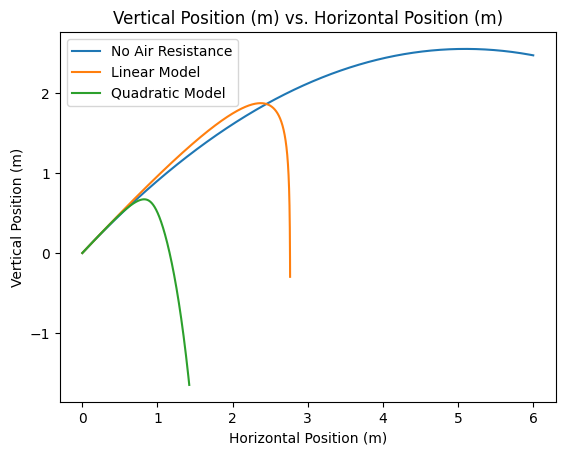

In [88]:
# Plot models
plt.plot(no_positions_x, no_positions_y, label="No Air Resistance")
plt.plot(linear_positions_x, linear_positions_y, label="Linear Model")
plt.plot(quadratic_positions_x, quadratic_positions_y, label="Quadratic Model")
plt.title("Vertical Position (m) vs. Horizontal Position (m)")
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Vertical Position (m)")
plt.legend(["No Air Resistance", "Linear Model", "Quadratic Model"])
plt.savefig("Horizontal Position (m) vs. Time (s).png", dpi=300)
plt.show()